In [1]:
import pandas as pd
import numpy as np 
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
plt.style.use('seaborn')

In [2]:
#Getting the current file directory
os.getcwd() 

'C:\\Users\\kings\\Downloads\\AskPyFesh Challenge 2 dataset'

In [3]:
#a list of the csv files in the directory
my_list = os.listdir('.\\covid')

In [4]:
my_list

['covid_help_data_01-May-2020 10-02-27.csv',
 'covid_help_data_01-May-2020 23-40-36.csv',
 'covid_help_data_02-May-2020 10-02-32.csv',
 'covid_help_data_02-May-2020 23-40-44.csv',
 'covid_help_data_03-Apr-2020 00-40-28.csv',
 'covid_help_data_03-Apr-2020 23-40-26.csv',
 'covid_help_data_03-May-2020 10-02-26.csv',
 'covid_help_data_03-May-2020 23-40-27.csv',
 'covid_help_data_04-Apr-2020 00-40-27.csv',
 'covid_help_data_04-Apr-2020 23-40-25.csv',
 'covid_help_data_04-May-2020 10-02-27.csv',
 'covid_help_data_04-May-2020 23-40-33.csv',
 'covid_help_data_05-Apr-2020 00-40-26.csv',
 'covid_help_data_05-Apr-2020 10-35-27.csv',
 'covid_help_data_05-May-2020 10-02-30.csv',
 'covid_help_data_05-May-2020 23-40-32.csv',
 'covid_help_data_06-May-2020 10-02-26.csv',
 'covid_help_data_06-May-2020 23-40-28.csv',
 'covid_help_data_07-Apr-2020 14-39-19.csv',
 'covid_help_data_07-Apr-2020 14-53-19.csv',
 'covid_help_data_07-Apr-2020 23-40-37.csv',
 'covid_help_data_07-May-2020 10-02-25.csv',
 'covid_he

In [5]:
#creating a list of files documented in May
covid_may = [file for file in my_list if 'May' in file]

In [6]:
#sorting the list created above into different time(i.e !11pm+ and Other Time)
covid_may_11pm = []
covid_may_other_time = []

for files in covid_may:
    file = files.split('-')
    if '23' in file[-3]:
        covid_may_11pm.append(files)
    else:
        covid_may_other_time.append(files)

In [7]:
len(covid_may_11pm) + len(covid_may_other_time) == len(covid_may)

True

In [8]:
# Creating a dataframe for covid_may_11pm
covid_may_11pm_df = pd.DataFrame()

for files in covid_may_11pm:
    df = pd.read_csv('.\\covid\\' + files)
    covid_may_11pm_df = pd.concat([covid_may_11pm_df, df])

In [9]:
covid_may_11pm_df.head()

,countries,infected,infected_today,deaths,deaths_today,recovered,recovered_today,active,critical,tests,death_rate,recovery_rate
0,United States,1129882,35152,65724,1883,161551,9227,902607,16478,6690837,5.8,14.3
1,Spain,242988,3349,24824,281,142450,4466,75714,2500,1528833,10.2,58.6
2,Italy,207428,1965,28236,269,78249,2304,100943,1578,2053425,13.6,37.7
3,United Kingdom,178566,6206,27579,741,856,31,150131,1559,1023824,15.4,0.5
4,France,167346,168,24594,218,50212,736,92540,3878,1100228,14.7,30.0


In [10]:
#creating a new columns for date and time
covid_may_11pm_df['month'] = 'May'
covid_may_11pm_df['time'] = '11pm'

In [11]:
#creating a function that creates a dataframe off my list
def gen_df(my_list):
    df = pd.DataFrame()
    current_dir = os.getcwd()
    for file in my_list:
        df1 = pd.read_csv('{}\\covid\\{}'.format(current_dir, file))
        df = pd.concat([df,df1],sort=False)
    return df

In [12]:
#dataframe for covid_may_other_time
covid_may_other_time_df = gen_df(covid_may_other_time)

In [13]:
covid_may_other_time_df.head()

,countries,infected,infected_today,deaths,deaths_today,recovered,recovered_today,active,critical,tests,death_rate,recovery_rate
0,United States,1095304,574,63871,30,155737,3413,875696,15226,6391887,5.8,14.2
1,Spain,239639,0,24543,0,137984,0,77112,2676,1455306,10.2,57.6
2,Italy,205463,0,27967,0,75945,0,101551,1694,1979217,13.6,37.0
3,United Kingdom,172363,3,26838,0,825,0,144700,1559,901905,15.6,0.5
4,France,167178,0,24376,0,49476,0,93326,4019,724574,14.6,29.6


In [14]:
#creating new columns for date and time
covid_may_other_time_df['month'] = 'May'
covid_may_other_time_df['time'] = 'Other Time'

In [15]:
covid_may_other_time_df.head()

,countries,infected,infected_today,deaths,deaths_today,recovered,recovered_today,active,critical,tests,death_rate,recovery_rate,month,time
0,United States,1095304,574,63871,30,155737,3413,875696,15226,6391887,5.8,14.2,May,Other Time
1,Spain,239639,0,24543,0,137984,0,77112,2676,1455306,10.2,57.6,May,Other Time
2,Italy,205463,0,27967,0,75945,0,101551,1694,1979217,13.6,37.0,May,Other Time
3,United Kingdom,172363,3,26838,0,825,0,144700,1559,901905,15.6,0.5,May,Other Time
4,France,167178,0,24376,0,49476,0,93326,4019,724574,14.6,29.6,May,Other Time


In [16]:
#concantenating both dataframes(covid_may_11pm and covid_may_other_time)
covid_may_df = pd.concat([covid_may_11pm_df, covid_may_other_time_df])

In [17]:
covid_may_df.head()

,countries,infected,infected_today,deaths,deaths_today,recovered,recovered_today,active,critical,tests,death_rate,recovery_rate,month,time
0,United States,1129882,35152,65724,1883,161551,9227,902607,16478,6690837,5.8,14.3,May,11pm
1,Spain,242988,3349,24824,281,142450,4466,75714,2500,1528833,10.2,58.6,May,11pm
2,Italy,207428,1965,28236,269,78249,2304,100943,1578,2053425,13.6,37.7,May,11pm
3,United Kingdom,178566,6206,27579,741,856,31,150131,1559,1023824,15.4,0.5,May,11pm
4,France,167346,168,24594,218,50212,736,92540,3878,1100228,14.7,30.0,May,11pm


In [18]:
covid_may_df.shape

(10352, 14)

In [19]:
#saving the new dataframe 
covid_may_df.to_csv('May Covid Cases.csv', index=False)

## Now we do for April

In [20]:
covid_april = [file for file in my_list if'Apr' in file]

In [21]:
covid_april_11pm = []
covid_april_other_time = []

for files in covid_april:
    file = files.split('-')
    if '23' in file[-3]:
        covid_april_11pm.append(files)
    else:
        covid_april_other_time.append(files)

In [22]:
len(covid_april_11pm) + len(covid_april_other_time) == len(covid_april)

True

In [23]:
covid_april_11pm_df = gen_df(covid_april_11pm)

In [24]:
covid_april_11pm_df.head()

,countries,infected,deaths,recovered,active,death_rate,recovery_rate,infected_today,deaths_today,recovered_today,critical,tests
0,United States,275493,7081,12097,256315,2.6,4.4,NaN,NaN,NaN,NaN,NaN
1,Italy,119827,14681,19758,85388,12.3,16.5,NaN,NaN,NaN,NaN,NaN
2,Spain,119199,11198,30513,77488,9.4,25.6,NaN,NaN,NaN,NaN,NaN
3,Germany,91159,1275,24575,65309,1.4,27.0,NaN,NaN,NaN,NaN,NaN
4,China,82492,3326,76741,2425,4.0,93.0,NaN,NaN,NaN,NaN,NaN


In [25]:
covid_april_11pm_df['month'] = 'April'
covid_april_11pm_df['time'] = '11pm'

In [26]:
covid_april_11pm_df.head()

,countries,infected,deaths,recovered,active,death_rate,recovery_rate,infected_today,deaths_today,recovered_today,critical,tests,month,time
0,United States,275493,7081,12097,256315,2.6,4.4,NaN,NaN,NaN,NaN,NaN,April,11pm
1,Italy,119827,14681,19758,85388,12.3,16.5,NaN,NaN,NaN,NaN,NaN,April,11pm
2,Spain,119199,11198,30513,77488,9.4,25.6,NaN,NaN,NaN,NaN,NaN,April,11pm
3,Germany,91159,1275,24575,65309,1.4,27.0,NaN,NaN,NaN,NaN,NaN,April,11pm
4,China,82492,3326,76741,2425,4.0,93.0,NaN,NaN,NaN,NaN,NaN,April,11pm


In [27]:
for file in covid_april_11pm:
    df = pd.read_csv('.\\covid\\' + file)
    print(df.shape)

(209, 7)
(209, 7)
(212, 12)
(212, 12)
(212, 12)
(214, 12)
(214, 12)
(214, 12)
(214, 12)
(214, 12)
(214, 12)
(214, 12)
(214, 12)
(214, 12)
(214, 12)
(214, 12)
(214, 12)
(216, 12)


In [28]:
covid_april_other_time_df = gen_df(covid_april_other_time)

In [29]:
covid_april_other_time_df.head()

,countries,infected,deaths,recovered,active,death_rate,recovery_rate,infected_today,deaths_today,recovered_today,critical,tests
0,United States,244190,5883,10400,227907,2.4,4.3,NaN,NaN,NaN,NaN,NaN
1,Italy,115242,13915,18278,83049,12.1,15.9,NaN,NaN,NaN,NaN,NaN
2,Spain,112065,10348,26743,74974,9.2,23.9,NaN,NaN,NaN,NaN,NaN
3,Germany,84794,1107,22440,61247,1.3,26.5,NaN,NaN,NaN,NaN,NaN
4,China,82413,3322,76546,2545,4.0,92.9,NaN,NaN,NaN,NaN,NaN


In [30]:
covid_april_other_time_df['month'] = 'April'
covid_april_other_time_df['time'] = 'Other Time'

In [31]:
covid_april_other_time_df.head()

,countries,infected,deaths,recovered,active,death_rate,recovery_rate,infected_today,deaths_today,recovered_today,critical,tests,month,time
0,United States,244190,5883,10400,227907,2.4,4.3,NaN,NaN,NaN,NaN,NaN,April,Other Time
1,Italy,115242,13915,18278,83049,12.1,15.9,NaN,NaN,NaN,NaN,NaN,April,Other Time
2,Spain,112065,10348,26743,74974,9.2,23.9,NaN,NaN,NaN,NaN,NaN,April,Other Time
3,Germany,84794,1107,22440,61247,1.3,26.5,NaN,NaN,NaN,NaN,NaN,April,Other Time
4,China,82413,3322,76546,2545,4.0,92.9,NaN,NaN,NaN,NaN,NaN,April,Other Time


#### wondering why we have null values in the dataframe above? check the code below

In [32]:
for file in covid_april_other_time:
    df = pd.read_csv('.\\covid\\' +file)
    print(df.shape)

(209, 7)
(209, 7)
(209, 7)
(210, 7)
(212, 12)
(212, 12)
(212, 12)
(218, 12)
(213, 12)
(213, 12)
(213, 12)
(213, 12)
(213, 12)
(213, 12)
(214, 12)
(214, 12)
(214, 12)
(214, 12)
(214, 12)
(214, 12)
(214, 12)
(214, 12)
(214, 12)
(214, 12)
(214, 12)
(214, 12)
(214, 12)
(214, 12)


In [33]:
covid_april_df = pd.concat([covid_april_11pm_df,covid_april_other_time_df])

In [34]:
covid_april_df.head()

,countries,infected,deaths,recovered,active,death_rate,recovery_rate,infected_today,deaths_today,recovered_today,critical,tests,month,time
0,United States,275493,7081,12097,256315,2.6,4.4,NaN,NaN,NaN,NaN,NaN,April,11pm
1,Italy,119827,14681,19758,85388,12.3,16.5,NaN,NaN,NaN,NaN,NaN,April,11pm
2,Spain,119199,11198,30513,77488,9.4,25.6,NaN,NaN,NaN,NaN,NaN,April,11pm
3,Germany,91159,1275,24575,65309,1.4,27.0,NaN,NaN,NaN,NaN,NaN,April,11pm
4,China,82492,3326,76741,2425,4.0,93.0,NaN,NaN,NaN,NaN,NaN,April,11pm


In [35]:
covid_april_df.to_csv('April Covid Cases.csv', index=False)

In [36]:
#Total number of files in covid 11pm+
covid_11pm = len(covid_april_11pm) + len(covid_may_11pm)
covid_11pm

42

In [37]:
#total number of files in covid other time
covid_other_time = len(covid_april_other_time) + len(covid_may_other_time)
covid_other_time

51

## Now working with the Wolrd data.

In [38]:
my_list2 = os.listdir('.\\world')

In [39]:
my_list2

['worldwide_01-May-2020 10-11-07.csv',
 'worldwide_01-May-2020 23-49-16.csv',
 'worldwide_02-Apr-2020 23-56-11.csv',
 'worldwide_02-May-2020 10-11-19.csv',
 'worldwide_02-May-2020 23-49-17.csv',
 'worldwide_03-Apr-2020 00-40-28.csv',
 'worldwide_03-Apr-2020 23-40-26.csv',
 'worldwide_03-May-2020 10-11-08.csv',
 'worldwide_03-May-2020 23-49-02.csv',
 'worldwide_04-Apr-2020 00-40-27.csv',
 'worldwide_04-Apr-2020 23-40-25.csv',
 'worldwide_04-May-2020 10-11-11.csv',
 'worldwide_04-May-2020 23-49-07.csv',
 'worldwide_05-Apr-2020 00-40-26.csv',
 'worldwide_05-Apr-2020 10-43-32.csv',
 'worldwide_05-May-2020 10-11-15.csv',
 'worldwide_05-May-2020 23-49-08.csv',
 'worldwide_06-May-2020 10-11-10.csv',
 'worldwide_06-May-2020 23-49-04.csv',
 'worldwide_07-Apr-2020 13-43-41.csv',
 'worldwide_07-Apr-2020 23-49-27.csv',
 'worldwide_07-May-2020 10-11-07.csv',
 'worldwide_07-May-2020 23-49-04.csv',
 'worldwide_08-Apr-2020 06-49-34.csv',
 'worldwide_08-Apr-2020 23-49-20.csv',
 'worldwide_08-May-2020 1

In [40]:
world_may = [file for file in my_list2 if 'May' in file]

In [41]:
world_may[1].split('-')[-3]

'2020 23'

In [42]:
world_may_11pm = []
world_may_other_time = []

for files in world_may:
    file = (files.split('-'))
    if '23' in file[-3]:
        world_may_11pm.append(files)
    else:
        world_may_other_time.append(files)

In [43]:
len(world_may_11pm) + len(world_may_other_time) == len(world_may)

True

In [44]:
world_may_11pm_df = pd.DataFrame()

for files in world_may_11pm:
    df = pd.read_csv('.\\world\\' + files)
    world_may_11pm_df = pd.concat([world_may_11pm_df, df],sort=False)

In [45]:
world_may_11pm_df.head()

,Country,Total confirmed,Total_confirmed_today,Total_deaths,Total_deaths_today,Total_Recoveries,Total_Recoveries_today,Active_confirmed,Critical,Mortality_close,Mortality_confirmed,Total_tests,Total_tests_today
0,united-states,"1,129,882","35,152","65,724","1,883","161,551","9,227","902,607","16,478 (2%)","902,607",6%,"6,690,837","314,371"
1,spain,"242,988","3,349","24,824",281,"142,450","4,466","75,714","2,500 (3%)","75,714",10%,"1,528,833","73,527"
2,italy,"207,428","1,965","28,236",269,"78,249","2,304","100,943","1,578 (2%)","100,943",14%,"2,053,425","74,208"
3,united-kingdom,"178,566","6,206","27,579",741,856,31,"150,131","1,559 (1%)","150,131",15%,"1,023,824","121,919"
4,france,"167,346",168,"24,594",218,"50,212",736,"92,540","3,878 (4%)","92,540",15%,"1,100,228","375,654"


In [46]:
world_may_11pm_df['Month'] = 'May'
world_may_11pm_df['Time'] = '11pm'

In [47]:
world_may_11pm_df.shape

(5178, 15)

In [48]:
world_may_other_time_df = pd.DataFrame()

for files in world_may_other_time:
    df = pd.read_csv('.\\world\\' + files)
    world_may_other_time_df = pd.concat([world_may_other_time_df,df],sort=False)

In [49]:
world_may_other_time_df['Month'] = 'May'
world_may_other_time_df['Time'] = 'Other Time'

In [50]:
world_may_other_time_df.shape

(4959, 15)

In [51]:
world_may_other_time_df.head()

,Country,Total confirmed,Total_confirmed_today,Total_deaths,Total_deaths_today,Total_Recoveries,Total_Recoveries_today,Active_confirmed,Critical,Mortality_close,Mortality_confirmed,Total_tests,Total_tests_today,Month,Time
0,united-states,"1,095,304",574,"63,871",30,"155,737","3,413","875,696","15,226 (2%)","875,696",6%,"6,391,887","15,421",May,Other Time
1,spain,"239,639","2,740","24,543",268,"137,984","5,055","77,112","2,676 (3%)","77,112",10%,"1,455,306","40,829",May,Other Time
2,italy,"205,463","1,872","27,967",285,"75,945","4,693","101,551","1,694 (2%)","101,551",14%,"1,979,217","68,456",May,Other Time
3,united-kingdom,"172,363",3,"26,838",0,825,0,"144,700","1,559 (1%)","144,700",16%,"901,905",0,May,Other Time
4,france,"167,178",758,"24,376",289,"49,476","1,248","93,326","4,019 (4%)","93,326",15%,"724,574","260,912",May,Other Time


In [52]:
world_may_df = pd.concat([world_may_11pm_df,world_may_other_time_df])

In [53]:
world_may_df.shape

(10137, 15)

In [54]:
world_may_df.to_csv('World May Cases.csv', index=False)

In [55]:
world_april = [file for file in my_list2 if 'Apr' in file]

In [56]:
world_april_11pm = []
world_april_other_time = []

for files in world_april:
    file = files.split('-')
    if '23' in file[-3]:
        world_april_11pm.append(files)
    else:
        world_april_other_time.append(files)

In [57]:
len(world_april_11pm) + len(world_april_other_time) == len(world_april)

True

In [58]:
df_x = pd.read_csv('.\\world\\worldwide_02-Apr-2020 23-56-11.csv')

In [59]:
len(df_x.columns)

7

In [60]:
df_x.columns

Index(['Country', 'Total confirmed cases', 'Total deaths',
       'Confirmed recoveries', 'Cases confirmed today', 'Deaths today',
       'Recoveries confirmed today'],
      dtype='object')

In [61]:
df_y = pd.read_csv('.\\world\\worldwide_15-Apr-2020 23-49-27.csv')

In [62]:
len(df_y.columns)

13

In [63]:
df_y.columns

Index(['Country', 'Total confirmed', 'Total_confirmed_today', 'Total_deaths',
       'Total_deaths_today', 'Total_Recoveries', 'Total_Recoveries_today',
       'Active_confirmed', 'Critical', 'Mortality_close',
       'Mortality_confirmed', 'Total_tests', 'Total_tests_today'],
      dtype='object')

In [64]:
current_dir = os.getcwd()

In [65]:
current_dir

'C:\\Users\\kings\\Downloads\\AskPyFesh Challenge 2 dataset'

In [66]:
thirteen_cols = []
seven_cols = []

for files in world_april_11pm:
    df_1 = pd.read_csv('{}\\world\\{}'.format(current_dir, files))
    if (len(df_1.columns)==13):
        thirteen_cols.append(files)
    else:
        seven_cols.append(files)

In [67]:
len(thirteen_cols) + len(seven_cols) == len(world_april_11pm)

True

In [68]:
df_13 = pd.DataFrame() 

for files in thirteen_cols:
    df = pd.read_csv('{}\\world\\{}'.format(current_dir,files))
    df_13 = pd.concat([df_13,df],sort=False)

In [69]:
df_13.shape

(3258, 13)

In [70]:
df_7 = pd.DataFrame()

for files in seven_cols:
    df = pd.read_csv('{}\\world\\{}'.format(current_dir,files))
    df_7 = pd.concat([df_7,df],sort=False)

In [71]:
df_7.shape

(618, 7)

In [72]:
print(df_13.columns)
print(df_7.columns)

Index(['Country', 'Total confirmed', 'Total_confirmed_today', 'Total_deaths',
       'Total_deaths_today', 'Total_Recoveries', 'Total_Recoveries_today',
       'Active_confirmed', 'Critical', 'Mortality_close',
       'Mortality_confirmed', 'Total_tests', 'Total_tests_today'],
      dtype='object')
Index(['Country', 'Total confirmed cases', 'Total deaths',
       'Confirmed recoveries', 'Cases confirmed today', 'Deaths today',
       'Recoveries confirmed today'],
      dtype='object')


In [73]:
df_7 = df_7.rename({'Total confirmed cases':'Total confirmed',
                   'Total deaths':'Total_deaths',
                   'Deaths today':'Total_deaths_today',
                   'Cases confirmed today':'Total_confirmed_today',
                   'Confirmed recoveries':'Total_Recoveries',
                   'Recoveries confirmed today':'Total_Recoveries_today'},axis=1)

In [74]:
df_7.columns

Index(['Country', 'Total confirmed', 'Total_deaths', 'Total_Recoveries',
       'Total_confirmed_today', 'Total_deaths_today',
       'Total_Recoveries_today'],
      dtype='object')

In [75]:
absent_cols = [cols for cols in df_13 if cols not in df_7]

In [76]:
absent_cols

['Active_confirmed',
 'Critical',
 'Mortality_close',
 'Mortality_confirmed',
 'Total_tests',
 'Total_tests_today']

In [77]:
world_april_11pm_df = pd.concat([df_7, df_13],sort=False)

In [78]:
world_april_11pm_df.head()

,Country,Total confirmed,Total_deaths,Total_Recoveries,Total_confirmed_today,Total_deaths_today,Total_Recoveries_today,Active_confirmed,Critical,Mortality_close,Mortality_confirmed,Total_tests,Total_tests_today
0,united-states,"242,899","5,865","10,400","28,260",766,"1,522",NaN,NaN,NaN,NaN,NaN,NaN
1,italy,"115,242","13,915","18,278","4,668",760,"1,431",NaN,NaN,NaN,NaN,NaN,NaN
2,spain,"112,065","10,348","26,743","7,947",961,"4,096",NaN,NaN,NaN,NaN,NaN,NaN
3,germany,"84,794","1,107","22,440","6,813",176,"3,740",NaN,NaN,NaN,NaN,NaN,NaN
4,china,"82,413","3,322","76,546",53,6,142,NaN,NaN,NaN,NaN,NaN,NaN


In [79]:
world_april_11pm_df.shape

(3876, 13)

In [80]:
world_april_11pm_df['Month'] = 'April'
world_april_11pm_df['Time'] = '11pm'

In [81]:
thirteen_cols = []
seven_cols = []

for files in world_april_other_time:
    df = pd.read_csv('{}\\world\\{}'.format(current_dir, files))
    if (len(df.columns)==13):
        thirteen_cols.append(files)
    else:
        seven_cols.append(files)

In [82]:
print(len(thirteen_cols))
print(len(seven_cols))
len(thirteen_cols) + len(seven_cols)== len(world_april_other_time)

17
5


True

In [83]:
df_13 = pd.DataFrame()

for files in thirteen_cols:
    df = pd.read_csv('{}\\world\\{}'.format(current_dir,files))
    df_13 = pd.concat([df_13, df],sort=False)

In [84]:
df_13.shape

(3448, 13)

In [85]:
df_7 = pd.DataFrame()

for files in seven_cols:
    df = pd.read_csv('{}\\world\\{}'.format(current_dir,files))
    df_7 = pd.concat([df_7,df],sort=False)

In [86]:
df_7.shape

(1011, 7)

In [87]:
print(df_7.columns)
print(df_13.columns)

Index(['Country', 'Total confirmed cases', 'Total deaths',
       'Confirmed recoveries', 'Cases confirmed today', 'Deaths today',
       'Recoveries confirmed today'],
      dtype='object')
Index(['Country', 'Total confirmed', 'Total_confirmed_today', 'Total_deaths',
       'Total_deaths_today', 'Total_Recoveries', 'Total_Recoveries_today',
       'Active_confirmed', 'Critical', 'Mortality_close',
       'Mortality_confirmed', 'Total_tests', 'Total_tests_today'],
      dtype='object')


In [88]:
df_7 = df_7.rename({'Total confirmed cases':'Total confirmed',
                   'Total deaths':'Total_deaths',
                   'Deaths today':'Total_deaths_today',
                   'Cases confirmed today':'Total_confirmed_today',
                   'Confirmed recoveries':'Total_Recoveries',
                   'Recoveries confirmed today':'Total_Recoveries_today'},axis=1)

In [89]:
world_april_other_time_df = pd.concat([df_7,df_13],sort=False)

In [90]:
world_april_other_time_df.head()

,Country,Total confirmed,Total_deaths,Total_Recoveries,Total_confirmed_today,Total_deaths_today,Total_Recoveries_today,Active_confirmed,Critical,Mortality_close,Mortality_confirmed,Total_tests,Total_tests_today
0,united-states,"244,190","5,883","10,400","29,551",784,"1,522",NaN,NaN,NaN,NaN,NaN,NaN
1,italy,"115,242","13,915","18,278","4,668",760,"1,431",NaN,NaN,NaN,NaN,NaN,NaN
2,spain,"112,065","10,348","26,743","7,947",961,"4,096",NaN,NaN,NaN,NaN,NaN,NaN
3,germany,"84,794","1,107","22,440","6,813",176,"3,740",NaN,NaN,NaN,NaN,NaN,NaN
4,china,"82,413","3,322","76,546",53,6,142,NaN,NaN,NaN,NaN,NaN,NaN


In [91]:
world_april_other_time_df['Month'] = 'April'
world_april_other_time_df['Time'] ='Other Time'

In [92]:
world_april_other_time_df.shape

(4459, 15)

In [93]:
world_april_11pm_df.shape

(3876, 15)

In [94]:
world_april_df = pd.concat([world_april_11pm_df,world_april_other_time_df],sort=False)

In [95]:
world_april_df.head()

,Country,Total confirmed,Total_deaths,Total_Recoveries,Total_confirmed_today,Total_deaths_today,Total_Recoveries_today,Active_confirmed,Critical,Mortality_close,Mortality_confirmed,Total_tests,Total_tests_today,Month,Time
0,united-states,"242,899","5,865","10,400","28,260",766,"1,522",NaN,NaN,NaN,NaN,NaN,NaN,April,11pm
1,italy,"115,242","13,915","18,278","4,668",760,"1,431",NaN,NaN,NaN,NaN,NaN,NaN,April,11pm
2,spain,"112,065","10,348","26,743","7,947",961,"4,096",NaN,NaN,NaN,NaN,NaN,NaN,April,11pm
3,germany,"84,794","1,107","22,440","6,813",176,"3,740",NaN,NaN,NaN,NaN,NaN,NaN,April,11pm
4,china,"82,413","3,322","76,546",53,6,142,NaN,NaN,NaN,NaN,NaN,NaN,April,11pm


In [96]:
world_april_df.to_csv('World April Cases.csv',index=False)

In [97]:
#total files in World 11pm
world_11pm_files = len(world_may_11pm) + len(world_april_11pm)
world_11pm_files

43

In [98]:
world_other_time_files = len(world_april_other_time) + len(world_may_other_time)
world_other_time_files

45

#### Data wrangling completed

## Starting the analysis

In [99]:
df_world_may = pd.read_csv('World May Cases.csv')
df_world_may.head()

,Country,Total confirmed,Total_confirmed_today,Total_deaths,Total_deaths_today,Total_Recoveries,Total_Recoveries_today,Active_confirmed,Critical,Mortality_close,Mortality_confirmed,Total_tests,Total_tests_today,Month,Time
0,united-states,"1,129,882","35,152","65,724","1,883","161,551","9,227","902,607","16,478 (2%)","902,607",6%,"6,690,837","314,371",May,11pm
1,spain,"242,988","3,349","24,824",281,"142,450","4,466","75,714","2,500 (3%)","75,714",10%,"1,528,833","73,527",May,11pm
2,italy,"207,428","1,965","28,236",269,"78,249","2,304","100,943","1,578 (2%)","100,943",14%,"2,053,425","74,208",May,11pm
3,united-kingdom,"178,566","6,206","27,579",741,856,31,"150,131","1,559 (1%)","150,131",15%,"1,023,824","121,919",May,11pm
4,france,"167,346",168,"24,594",218,"50,212",736,"92,540","3,878 (4%)","92,540",15%,"1,100,228","375,654",May,11pm


In [100]:
df_world_april = pd.read_csv('World April Cases.csv')
df_world_april.head()

,Country,Total confirmed,Total_deaths,Total_Recoveries,Total_confirmed_today,Total_deaths_today,Total_Recoveries_today,Active_confirmed,Critical,Mortality_close,Mortality_confirmed,Total_tests,Total_tests_today,Month,Time
0,united-states,"242,899","5,865","10,400","28,260",766,"1,522",NaN,NaN,NaN,NaN,NaN,NaN,April,11pm
1,italy,"115,242","13,915","18,278","4,668",760,"1,431",NaN,NaN,NaN,NaN,NaN,NaN,April,11pm
2,spain,"112,065","10,348","26,743","7,947",961,"4,096",NaN,NaN,NaN,NaN,NaN,NaN,April,11pm
3,germany,"84,794","1,107","22,440","6,813",176,"3,740",NaN,NaN,NaN,NaN,NaN,NaN,April,11pm
4,china,"82,413","3,322","76,546",53,6,142,NaN,NaN,NaN,NaN,NaN,NaN,April,11pm


In [101]:
world = pd.concat([df_world_april,df_world_may],sort=False)

In [102]:
world.shape

(18472, 15)

In [103]:
world.head()

,Country,Total confirmed,Total_deaths,Total_Recoveries,Total_confirmed_today,Total_deaths_today,Total_Recoveries_today,Active_confirmed,Critical,Mortality_close,Mortality_confirmed,Total_tests,Total_tests_today,Month,Time
0,united-states,"242,899","5,865","10,400","28,260",766,"1,522",NaN,NaN,NaN,NaN,NaN,NaN,April,11pm
1,italy,"115,242","13,915","18,278","4,668",760,"1,431",NaN,NaN,NaN,NaN,NaN,NaN,April,11pm
2,spain,"112,065","10,348","26,743","7,947",961,"4,096",NaN,NaN,NaN,NaN,NaN,NaN,April,11pm
3,germany,"84,794","1,107","22,440","6,813",176,"3,740",NaN,NaN,NaN,NaN,NaN,NaN,April,11pm
4,china,"82,413","3,322","76,546",53,6,142,NaN,NaN,NaN,NaN,NaN,NaN,April,11pm


In [104]:
world_11pm =world[world['Time']=='11pm']

In [105]:
world_11pm.head()

,Country,Total confirmed,Total_deaths,Total_Recoveries,Total_confirmed_today,Total_deaths_today,Total_Recoveries_today,Active_confirmed,Critical,Mortality_close,Mortality_confirmed,Total_tests,Total_tests_today,Month,Time
0,united-states,"242,899","5,865","10,400","28,260",766,"1,522",NaN,NaN,NaN,NaN,NaN,NaN,April,11pm
1,italy,"115,242","13,915","18,278","4,668",760,"1,431",NaN,NaN,NaN,NaN,NaN,NaN,April,11pm
2,spain,"112,065","10,348","26,743","7,947",961,"4,096",NaN,NaN,NaN,NaN,NaN,NaN,April,11pm
3,germany,"84,794","1,107","22,440","6,813",176,"3,740",NaN,NaN,NaN,NaN,NaN,NaN,April,11pm
4,china,"82,413","3,322","76,546",53,6,142,NaN,NaN,NaN,NaN,NaN,NaN,April,11pm


In [106]:
world_other_time = world[world['Time']=='Other Time']

In [107]:
world_other_time.head()

,Country,Total confirmed,Total_deaths,Total_Recoveries,Total_confirmed_today,Total_deaths_today,Total_Recoveries_today,Active_confirmed,Critical,Mortality_close,Mortality_confirmed,Total_tests,Total_tests_today,Month,Time
3876,united-states,"244,190","5,883","10,400","29,551",784,"1,522",NaN,NaN,NaN,NaN,NaN,NaN,April,Other Time
3877,italy,"115,242","13,915","18,278","4,668",760,"1,431",NaN,NaN,NaN,NaN,NaN,NaN,April,Other Time
3878,spain,"112,065","10,348","26,743","7,947",961,"4,096",NaN,NaN,NaN,NaN,NaN,NaN,April,Other Time
3879,germany,"84,794","1,107","22,440","6,813",176,"3,740",NaN,NaN,NaN,NaN,NaN,NaN,April,Other Time
3880,china,"82,413","3,322","76,546",53,6,142,NaN,NaN,NaN,NaN,NaN,NaN,April,Other Time


## Q1. Using World 11pm, how many cases did the United States and Germany each Record in April?

In [108]:
US = df_world_april[(df_world_april['Country'] == 'united-states') &\
                    (df_world_april['Time'] == '11pm')]

In [109]:
US.head()

,Country,Total confirmed,Total_deaths,Total_Recoveries,Total_confirmed_today,Total_deaths_today,Total_Recoveries_today,Active_confirmed,Critical,Mortality_close,Mortality_confirmed,Total_tests,Total_tests_today,Month,Time
0,united-states,"242,899","5,865","10,400","28,260",766,"1,522",NaN,NaN,NaN,NaN,NaN,NaN,April,11pm
206,united-states,"275,493","7,081","12,097","31,263","1,198","1,694",NaN,NaN,NaN,NaN,NaN,NaN,April,11pm
412,united-states,"308,608","8,397","14,691","31,643","1,006","2,408",NaN,NaN,NaN,NaN,NaN,NaN,April,11pm
1186,united-states,"682,608","23,592","36,205","122,362","1,491","3,968","622,811","12,772 (2%)","622,811",3%,"2,936,860","104,602",April,11pm
1383,united-states,"611,745","25,975","38,675","31,137","2,365","2,457","547,095","13,473 (2%)","547,095",4%,"3,065,019","127,081",April,11pm


In [110]:
US['Total confirmed'] =  US['Total confirmed'].str.replace(',','')

In [111]:
US['Total confirmed'] = pd.to_numeric(US['Total confirmed'])

In [112]:
US_cases = US['Total confirmed'].max() - US['Total confirmed'].min()

In [113]:
US_cases

851822

In [114]:
Germany = df_world_april[(df_world_april['Country']=='germany') & (df_world_april['Time']=='11pm')]

In [115]:
Germany['Total confirmed'] = Germany['Total confirmed'].str.replace(',','')

In [116]:
Germany['Total confirmed'] = pd.to_numeric(Germany['Total confirmed'])

In [117]:
Ger_cases = Germany['Total confirmed'].max() - Germany['Total confirmed'].min()

In [118]:
Ger_cases

78215

In [119]:
data = {'Country':['United States','Germany'],
       'Confirmed Cases':[US_cases, Ger_cases]}

df = pd.DataFrame(data)
df

,Country,Confirmed Cases
0,United States,851822
1,Germany,78215


Text(0.5, 1.0, 'Covid-19 Cases Recorded in United States and Germany in April(World 11pm+)')

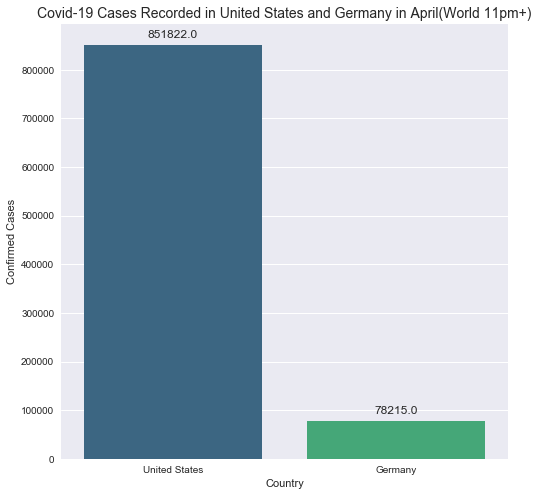

In [120]:
fig = plt.figure(figsize=(8,8))
ax = sns.barplot(x=df['Country'],y=df['Confirmed Cases'], palette='viridis')
for p in ax.patches:
    ax.annotate(format(p.get_height()),(p.get_x() + p.get_width()/2,p.get_height()),
                ha='center',va='center',xytext=(0,10),textcoords='offset points',fontsize=12)
plt.title('Covid-19 Cases Recorded in United States and Germany in April(World 11pm+)',fontsize=14)

## Q2. Using World 11pm, how many cases did the United States and Germany each Record in May?

In [121]:
US = df_world_may[(df_world_may['Country']=='united-states') & (df_world_may['Time']=='11pm')]

In [122]:
US['Total confirmed'] = US['Total confirmed'].str.replace(',','')

In [123]:
US['Total confirmed'] = pd.to_numeric(US['Total confirmed'])

In [124]:
US_cases = US['Total confirmed'].max() - US['Total confirmed'].min()

In [125]:
US_cases

555285

In [126]:
Germany = df_world_may[(df_world_may['Country']=='germany') & (df_world_may['Time']=='11pm')]

In [127]:
Germany['Total confirmed'] = Germany['Total confirmed'].str.replace(',','')

In [128]:
Germany['Total confirmed'] = pd.to_numeric(Germany['Total confirmed'])

In [129]:
Ger_cases = Germany['Total confirmed'].max() - Germany['Total confirmed'].min()

In [130]:
Ger_cases

16251

In [131]:
data = {'Country':['United States','Germany'],
       'Confirmed Cases':[US_cases, Ger_cases]}

df = pd.DataFrame(data)
df

,Country,Confirmed Cases
0,United States,555285
1,Germany,16251


Text(0.5, 1.0, 'Covid-19 Cases Recorded in United States and Germany in May(World 11pm+)')

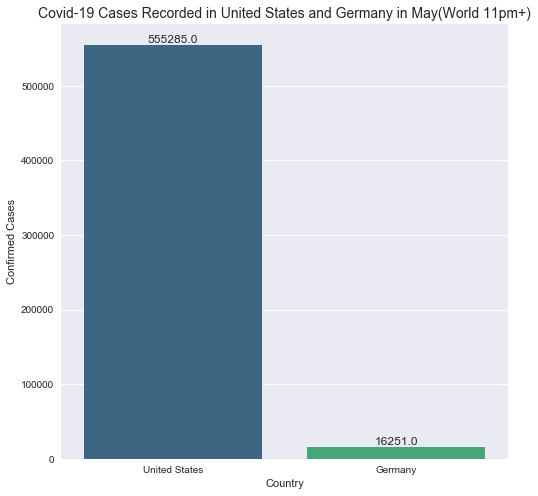

In [132]:
fig = plt.figure(figsize=(8,8))
ax = sns.barplot(x=df['Country'],y=df['Confirmed Cases'],palette='viridis')
for p in ax.patches:
    ax.annotate(format(p.get_height()),(p.get_x() + p.get_width()/2,p.get_height()),
               ha='center',va='bottom',fontsize=12)
plt.title('Covid-19 Cases Recorded in United States and Germany in May(World 11pm+)',fontsize=14)

In [133]:
df_covid_may = pd.read_csv('May Covid Cases.csv')
df_covid_may.head()

,countries,infected,infected_today,deaths,deaths_today,recovered,recovered_today,active,critical,tests,death_rate,recovery_rate,month,time
0,United States,1129882,35152,65724,1883,161551,9227,902607,16478,6690837,5.8,14.3,May,11pm
1,Spain,242988,3349,24824,281,142450,4466,75714,2500,1528833,10.2,58.6,May,11pm
2,Italy,207428,1965,28236,269,78249,2304,100943,1578,2053425,13.6,37.7,May,11pm
3,United Kingdom,178566,6206,27579,741,856,31,150131,1559,1023824,15.4,0.5,May,11pm
4,France,167346,168,24594,218,50212,736,92540,3878,1100228,14.7,30.0,May,11pm


In [134]:
df_covid_april = pd.read_csv('April Covid Cases.csv')
df_covid_april.head()

,countries,infected,deaths,recovered,active,death_rate,recovery_rate,infected_today,deaths_today,recovered_today,critical,tests,month,time
0,United States,275493,7081,12097,256315,2.6,4.4,NaN,NaN,NaN,NaN,NaN,April,11pm
1,Italy,119827,14681,19758,85388,12.3,16.5,NaN,NaN,NaN,NaN,NaN,April,11pm
2,Spain,119199,11198,30513,77488,9.4,25.6,NaN,NaN,NaN,NaN,NaN,April,11pm
3,Germany,91159,1275,24575,65309,1.4,27.0,NaN,NaN,NaN,NaN,NaN,April,11pm
4,China,82492,3326,76741,2425,4.0,93.0,NaN,NaN,NaN,NaN,NaN,April,11pm


## Q3. Using Covid Other time, how many cases did Italy and Russia each Record in April?

In [135]:
italy = df_covid_april[(df_covid_april['countries']=='Italy') & (df_covid_april['time']=='Other Time')]

In [136]:
italy.dtypes

countries           object
infected             int64
deaths               int64
recovered            int64
active               int64
death_rate         float64
recovery_rate      float64
infected_today     float64
deaths_today       float64
recovered_today    float64
critical           float64
tests              float64
month               object
time                object
dtype: object

In [137]:
italy_cases = italy['infected'].max() - italy['infected'].min()

In [138]:
italy_cases

88349

In [139]:
russia = df_covid_april[(df_covid_april['countries']=='Russia') & (df_covid_april['time']=='Other Time')]

In [140]:
russia_cases = russia['infected'].max() - russia['infected'].min()

In [141]:
russia_cases

102950

In [142]:
data = {'Country':['Italy', 'Russia'],
       'Infected':[italy_cases, russia_cases]}
df = pd.DataFrame(data)
df

,Country,Infected
0,Italy,88349
1,Russia,102950


Text(0.5, 1.0, 'Covid-19 Cases Recorded in Italy and Russia in April(Coivd Other Time)')

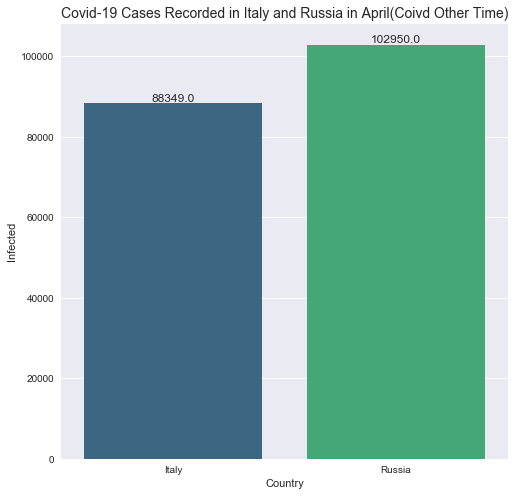

In [143]:
plt.figure(figsize=(8,8))
ax = sns.barplot(x=df['Country'],y=df['Infected'], palette='viridis')
for p in ax.patches:
    ax.annotate(format(p.get_height()),(p.get_x() + p.get_width()/2, p.get_height()),
               ha='center',va='bottom',fontsize=12)
plt.title('Covid-19 Cases Recorded in Italy and Russia in April(Coivd Other Time)',fontsize=14)

## Q4. Using Covid Other time, how many cases did Italy and Russia each Record in May?

In [144]:
italy = df_covid_may[(df_covid_may['countries']=='Italy') & (df_covid_may['time']=='Other Time')]

In [145]:
italy.dtypes

countries           object
infected             int64
infected_today       int64
deaths               int64
deaths_today         int64
recovered            int64
recovered_today      int64
active               int64
critical             int64
tests                int64
death_rate         float64
recovery_rate      float64
month               object
time                object
dtype: object

In [146]:
italy_cases = italy['infected'].max() - italy['infected'].min()

In [147]:
italy_cases

24395

In [148]:
russia = df_covid_may[(df_covid_may['countries']=='Russia') & (df_covid_may['time']=='Other Time')]

In [149]:
russia_cases = russia['infected'].max() - russia['infected'].min()

In [150]:
russia_cases

238996

In [151]:
data = {'Country':['Italy','Russia'],
       'Infected':[italy_cases, russia_cases]}

df = pd.DataFrame(data)
df

,Country,Infected
0,Italy,24395
1,Russia,238996


Text(0.5, 1.0, 'Covid-19 Cases Recorded in Italy and Russia in May(Coivd Other Time)')

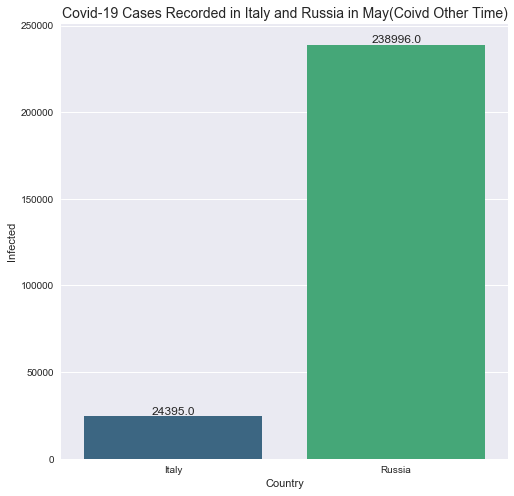

In [152]:
plt.figure(figsize=(8,8))
ax = sns.barplot(x=df['Country'],y=df['Infected'],palette='viridis')
for p in ax.patches:
    ax.annotate(format(p.get_height()),(p.get_x() + p.get_width()/2, p.get_height()),
               ha='center',va='bottom',fontsize=12)
plt.title('Covid-19 Cases Recorded in Italy and Russia in May(Coivd Other Time)',fontsize=14)

# Kicker

## Using World 11pm+, how many cases  were Recorded by United State, Italy, China, Russia, and Germany in April and May?


In [153]:
world_11pm['Total confirmed'] = world_11pm['Total confirmed'].str.replace(',','')

In [154]:
world_11pm['Total confirmed'] = pd.to_numeric(world_11pm['Total confirmed'])

In [155]:
world_11pm['Country'] = world_11pm['Country'].str.replace('USA','United-states')

In [156]:
world_11pm['Country'] = world_11pm['Country'].str.capitalize()

In [157]:
world_11pm['Country'].value_counts().head(10)

United-states    608
Russia            40
China             40
Martinique        40
Algeria           40
Colombia          40
Mauritania        40
Haiti             40
Malawi            40
Brazil            40
Name: Country, dtype: int64

In [158]:
US = world_11pm[(world_11pm['Country']=='United-states')]
US_cases = US['Total confirmed'].max() - US['Total confirmed'].min()
US_cases

1685163

In [159]:
Italy = world_11pm[(world_11pm['Country']=='Italy')]
Italy_cases= Italy['Total confirmed'].max() - Italy['Total confirmed'].min()
Italy_cases

114616

In [160]:
Germany = world_11pm[(world_11pm['Country']=='Germany')]
Germany_cases= Germany['Total confirmed'].max() - Germany['Total confirmed'].min()
Germany_cases

95534

In [161]:
Russia = world_11pm[(world_11pm['Country']=='Russia')]
Russia_cases = Russia['Total confirmed'].max() - Russia['Total confirmed'].min()
Russia_cases

340933

In [162]:
China = world_11pm[(world_11pm['Country']=='China')]
China_cases = China['Total confirmed'].max() - China['Total confirmed'].min()
China_cases

1393

In [163]:
data = {'Country':['United-states', 'Italy','Germany','Russia','China'],
       'Confirmed Cases':[US_cases,Italy_cases,Germany_cases,Russia_cases,China_cases]}

df = pd.DataFrame(data)
df

,Country,Confirmed Cases
0,United-states,1685163
1,Italy,114616
2,Germany,95534
3,Russia,340933
4,China,1393


Text(0.5, 1.0, 'COVID-19 cases Recorded by United State, Italy, China, Russia, and Germany in April and May(World 11pm+)')

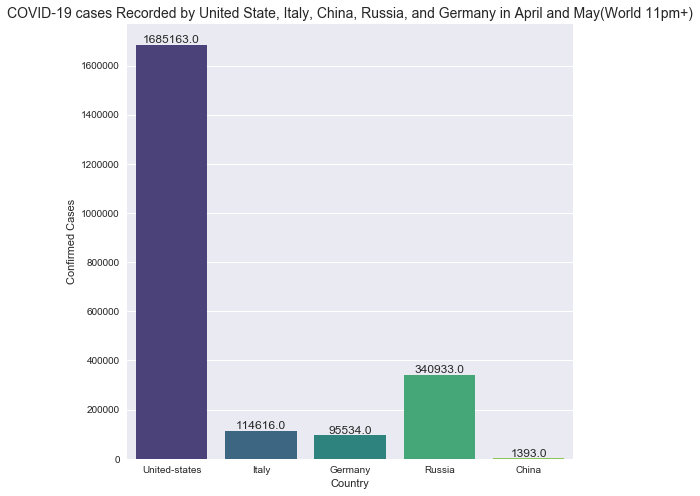

In [164]:
plt.figure(figsize=(8,8))
ax = sns.barplot(x=df['Country'],y=df['Confirmed Cases'], palette='viridis')
for p in ax.patches:
    ax.annotate(format(p.get_height()),(p.get_x() + p.get_width()/2, p.get_height()),
               ha='center', va='bottom',fontsize=12)
plt.title('COVID-19 cases Recorded by United State, Italy, China, Russia, and Germany in April and May(World 11pm+)',
          fontsize=14)